In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from __future__ import division
import os
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import bisect
import scipy
from scipy import stats
#import numdifftools as ndt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


/usr/local/lib/python2.7/site-packages/scipy/integrate/odepack.py:156: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/usr/local/lib/python2.7/site-packages/scipy/stats/_discrete_distns.py:55: RuntimeWarning: floating point number truncated to an integer
  vals = special.bdtr(k, n, p)


KeyboardInterrupt: 

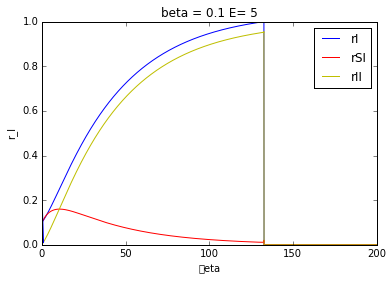

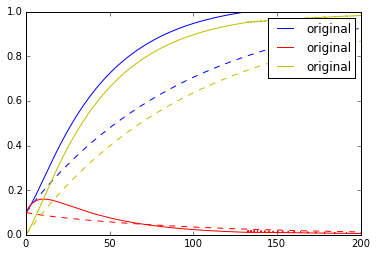

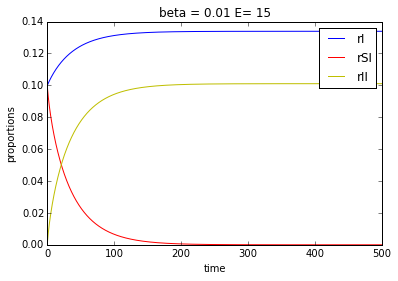

In [3]:
N = 1000
E = 5
beta = 0.1

def coolkids(X,t=0):
    rI, rSI, rII, = X
    rSS = 1-rSI - rII
    rS = 1 - rI
    IaSI = rSI/(rSI + 2*rII)
    SaSS = 2*rSS/(rSI + 2 * rSS)
    SaSI = rSI/(rSI + 2*rSS)
    dI = (E*rSI + 2*E*rII)/(N*rI)
    dS = (E*rSI + 2*E*rSS)/(N*rS)
    f0 = beta* rSI
    f1 = beta * rSI*(-1 + dS*SaSS) - rI*(1-(1-IaSI)**dI) + rS*(1-(1-SaSS)**dS) 
    f2 = beta * rSI*(1+dS*SaSI) + rI*(1-(1-IaSI)**dI)    
    return np.array([f0,f1,f2])

rIo = .1
rSIo = .1
rIIo = 0.0

T = 200
t_series = np.linspace(0,T, T*200)
T_coolkids = odeint(coolkids,[rIo, rSIo, rIIo],t_series)

fig = plt.figure()
plt.plot(t_series,T_coolkids[:,0], 'b',t_series,T_coolkids[:,1],'r',t_series, T_coolkids[:,2],'y')
plt.xlabel("time")
plt.ylabel("proportions")
plt.title("beta = " + str(beta) + " E= "+str(E))
plt.legend(["rI","rSI","rII"])
plt.plot(T_coolkids[:,0], T_coolkids[:,1])
plt.xlabel("rI")
plt.ylabel("rSI")
plt.title("beta = " + str(beta) + " E= "+str(E))


betas = np.linspace(0.001,0.1,100)
rIfinal = []
for beta in betas:
    T = 200
    t_series = np.linspace(0,T, T*200)
    T_coolkids = odeint(coolkids,[rIo, rSIo, rIIo],t_series)
    if T_coolkids[-1,0]==0.0:
        rIfinal.append(1)
    else:
        rIfinal.append(T_coolkids[-1,0])
        
plt.plot(betas, rIfinal)
plt.xlabel("\beta")
plt.ylabel("r_I")


def coolkids_simp(X,t=0):
    rI, rSI, rII, = X
    rSS = 1-rSI - rII
    rS = 1 - rI
    IaSI = rSI/(rSI + 2*rII)
    SaSS = 2*rSS/(rSI + 2 * rSS)
    SaSI = rSI/(rSI + 2*rSS)
    dI = (E*rSI + 2*E*rII)/(N*rI)
    dS = (E*rSI + 2*E*rSS)/(N*rS)
    f0 = beta* rSI
    f1 = beta * rSI*(-1 + dS*SaSS) - rI*(1-np.exp(-E*rSI/(N*rI))) + rS*(1-np.exp(-E*2*rSS/(N*rS))) 
    f2 = beta * rSI*(1+dS*SaSI) + rI*(1-np.exp(-E*rSI/(N*rI)))   
    return np.array([f0,f1,f2])

T = 200
t_series = np.linspace(0,T, T*200)
T_coolkids_simp = odeint(coolkids_simp,[rIo, rSIo, rIIo],t_series)

fig = plt.figure()
plt.plot(t_series,T_coolkids_simp[:,0], 'b--',t_series,T_coolkids_simp[:,1],'r--',t_series, T_coolkids_simp[:,2],'y--')
plt.plot(t_series,T_coolkids[:,0], 'b',t_series,T_coolkids[:,1],'r',t_series, T_coolkids[:,2],'y',label="original")
plt.legend()



def snobs(X,t=0):
    rI, rSI, rII, = X
    rSS = 1-rSI - rII
    rS = 1 - rI
    IaSI = rSI/(rSI + 2*rII)
    SaSS = 2*rSS/(rSI + 2 * rSS)
    SaSI = rSI/(rSI + 2*rSS)
    dI = (E*rSI + 2*E*rII)/(N*rI)
    dS = (E*rSI + 2*E*rSS)/(N*rS)
    f0 = beta* rSI
    f1 = beta * rSI*(-1 + dS*SaSS) -  rI*(1-(1-IaSI)**dI) - rS*(stats.binom.cdf(np.ceil((dS+2)/4),dS,SaSI) - stats.binom.cdf(1,dS,SaSI))
    + rS*(stats.binom.cdf(np.ceil((dS-(dS+2)/4)),dS,SaSS)-stats.binom.cdf(1,dS,SaSS)) 
    f2 = beta * rSI*(1+dS*SaSI) + rI*(1-(1-IaSI)**dI)     
    return np.array([f0,f1,f2])



rIo = .1
rSIo = .1
rIIo = 0.0

N = 1000
E = 15
beta = 0.01

T = 500
t_series = np.linspace(0,T, T*200)
T_snobs = odeint(snobs,[rIo, rSIo, rIIo],t_series)

fig = plt.figure()
plt.plot(t_series,T_snobs[:,0], 'b',t_series,T_snobs[:,1],'r',t_series, T_snobs[:,2],'y')
plt.xlabel("time")
plt.ylabel("proportions")
plt.title("beta = " + str(beta) + " E= "+str(E))
plt.legend(["rI","rSI","rII"])

betas = np.linspace(0.0001,2,1000)
rIfinal = []
for beta in betas:
    T = 200
    t_series = np.linspace(0,T, T*200)
    T_snobs = odeint(snobs,[rIo, rSIo, rIIo],t_series)
    if T_snobs[-1,0]==0.0:
        rIfinal.append(1)
    else:
        rIfinal.append(T_snobs[-1,0])

plt.plot(betas, rIfinal)
plt.xlabel(r"$\beta$")
plt.ylabel(r"$r_I$")
        

(10000, 4)


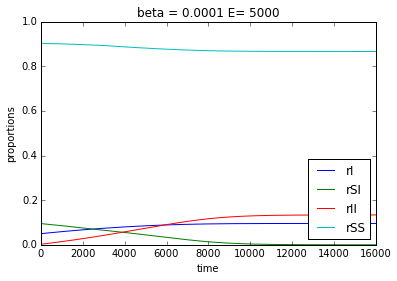

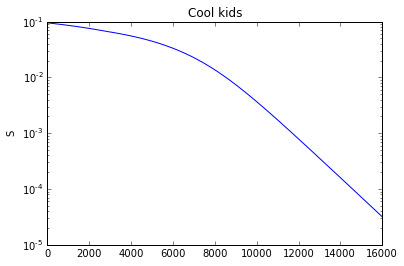

In [34]:
def get_update(case, debug=True):    
    def deriv(X,t=0):
        rI, rSI, rII,rSS = X
        #rSS = 1 - rSI - rII
        dI  = beta * rSI
        #print 'SaSS=%.3f SaSI=%.3f' % (SaSS,SaSI)
        delta = beta * rSI    
        dSI = delta * (2*rSS-rSI)/(1-rI)
        dII = delta * rSI/(1-rI)

        rSS = 1 - rSI - rII
        rS = 1 - rI
        IaII = 2*rII/(rSI + 2*rII) if rII > 0 else 0
        IaSI = rSI/(rSI + 2*rII) if rSI >0 else 0
        SaSS = 2*rSS/(rSI + 2 * rSS) if rSS > 0 else 0
        SaSI = rSI/(rSI + 2*rSS) if rSI > 0 else 0
        degI = (E*rSI + 2*E*rII)/(N*rI)
        degS = (E*rSI + 2*E*rSS)/(N*rS)
        if debug:
            print 'rI=%.3f rSI=%.3f rII=%.3f rSS=%.3f SaSS=%.3f degS=%.3f degI=%.3f dS*S=%.3f dS*I=%.3f, <d>=%.3f' % \
                  (rI, rSI, rII,rSS, SaSS, degS, degI, degS*SaSS, degS*SaSI, rI*degI + (1-rI)*degS)
        
        if case == 'evangelical':
            rewireSI = (rI*(1-(1-IaII)**degI) + rS*(1-(1-SaSS)**degS))
            rewireII =-(rI*(1-(1-IaII)**degI))
        elif case == 'coolkids':
            rewireSI = (- rI*(1-(1-IaSI)**degI) + rS*(1-(1-SaSS)**degS))
            rewireII = (rI*(1-(1-IaSI)**degI))
        elif case == 'snobs':
            sAssP= stats.binom.cdf(np.ceil((degS+2)/4),degS,SaSI) - stats.binom.cdf(1,degS,SaSI)
            sDissP = stats.binom.cdf(degS - np.ceil((degS+2)/4),degS,SaSS) - stats.binom.cdf(1,degS,SaSS)
            #print '%0.3f %0.3f'%(sDissP, sAssP)
            rewireSI = -rI*(1-(1-IaSI)**degI) + rS*sDissP - rS*sAssP
            rewireII = rI*(1-(1-IaSI)**degI)   
            
        dSI += rewireSI/E
        dII += rewireII/E
        dSS = - dSI - dII

        if False and (rSS ) <0:
            print 'rewireII=%.3f rewireSI=%.3f rSS=%.3f dSS=%.6f' % (-rewireII,rewireSI, rSS, dSS)
            print rewireSI + rewireII # print rS*(1-(1-SaSS)**degS)
            raise Exception('rSS becomes negative!', t)

        return np.array([dI,dSI,dII,dSS])

    return deriv

debug=False
#updatef = get_update('evangelical', debug)
#updatef = get_update('coolkids',debug)
updatef = get_update('snobs',debug)

rIo = .05
rSIo = ((1-rIo)*rIo)*2.0
rIIo = rIo*rIo
rSIo2 = rSIo

N = 1000
E = 2.5*N
E = 5*N
#beta = 0.005
#beta = 2e-4
#beta = 5e-5
beta = 1e-4
#beta = 1e-3
T = 16000

t_series = np.linspace(0,T, 10000)

if False:
    state=np.array([rIo, rSIo, rIIo,1-rSIo-rIIo])
    T_evang=[]
    for t in t_series: #  in range(T):
        T_evang.append(state.copy())
        state += 1e-1*updatef(state[:])
        #print state
        if state[0] > .999:
            break
    T_evang=np.array(T_evang)
    #print T_evang[:,0]
else:
    T_evang = odeint(updatef,[rIo, rSIo, rIIo,1-rSIo-rIIo],t_series)
    print T_evang.shape
fig = plt.figure()
plt.plot(t_series, T_evang)
#plt.yscale('log')
#plt.plot(np.arange(T_evang.shape[0]),T_evang[:,0], 'b',t_series,T_evang[:,1],'r',t_series, T_evang[:,2],'y')
plt.xlabel("time")
plt.ylabel("proportions")
plt.title("beta = " + str(beta) + " E= "+str(E))
plt.legend(["rI","rSI","rII","rSS"], loc='lower right')
plt.ylim([0,1])
fig = plt.figure()
plt.plot(t_series,T_evang[:,1])
#plt.legend(["rI","rSI","rII","rSS"], loc='lower right')
plt.yscale('log')
plt.ylabel("S")
plt.title("Cool kids")

In [48]:
rI = .186

print 'rI=',rI
print 'rII=',rI*rI
print 'rSI=',(1-rI)*rI*2
print 'rSS=',(1-rI)*(1-rI)

rI= 0.186
rII= 0.034596
rSI= 0.302808
rSS= 0.662596


In [322]:
T_evang[-1,0]

0.64799562716358061

In [336]:
np.savetxt("evangelical_trajectory.csv", np.column_stack((t_series,T_evang[:,0])), delimiter=",")

In [343]:
1/E

0.0002

In [348]:
beta

0.0008